In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif',
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 9}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (7, 3) # The unit here is inches. 3.5 is good for one column, 7 is good for whole page

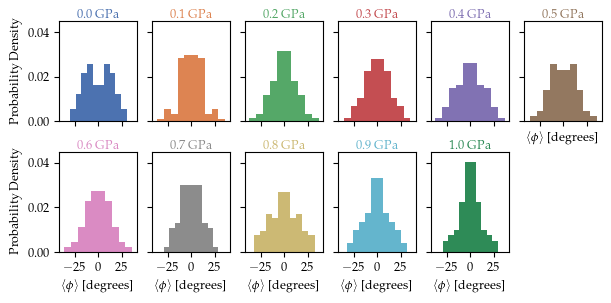

In [8]:
pressures = np.array([0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000])

f, ax = plt.subplots(2, int((len(pressures)+1)/2), sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.2, hspace=0.3)
new_color = 'seagreen'

colors = [
    (0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
    (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
    (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
    (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
    (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
    (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
    (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
    (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
    (0.8, 0.7254901960784313, 0.4549019607843137),
    (0.39215686274509803, 0.7098039215686275, 0.803921568627451)
] + [new_color]

# Carica tutti i dati una sola volta
data_last = np.genfromtxt("last_phi_med.txt")
data_phi_med_new = np.genfromtxt("phi_med_new.txt")

for pressure, j in zip(pressures, np.arange(len(pressures))):
    if pressure in [0, 1000, 5000, 6000]:
        data = data_phi_med_new
    else:
        data = data_last
    
    phi = data[data[:, 0] == pressure, 1]  # Estrai i valori di phi corrispondenti alla pressione

    # Symmetrize
    phi = np.concatenate((phi, -phi))
    l = int(2 * j / len(pressures))
    m = j % int((len(pressures)+1)/2)

    ax[l, m].text(0, 0.046, '{0:3.1f}'.format(pressure*0.000101325) + " GPa", color=colors[j], ha='center')
    ax[l, m].hist(phi, bins=10, color=colors[j], density=True)
    
    if m == 0:
        ax[l, m].set_ylabel("Probability Density")
    if l == 1:
        ax[l, m].set_xlabel(r"$\langle \phi \rangle$ [degrees]")

ax[0, -1].set_xlabel(r"$\langle \phi \rangle$ [degrees]")
ax[-1, -1].remove()
plt.ylim([0, 0.045])
plt.savefig("figs/prob_density_cooling.pdf", bbox_inches='tight')
plt.show()
